In [1]:
import numpy as np
import torch
import seaborn as sns
import sys, os

import matplotlib.pyplot as plt

currentdir = os.path.dirname(os.path.abspath(''))
parentdir = os.path.dirname(currentdir)
grandparentdir = os.path.dirname(parentdir)
sys.path.append(grandparentdir)
import res.fnn.functions as func
import res.process_data.n_n_distance as nn
import res.process_data.dire_and_coor as dc

0.0
0.0
[[0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [10]:
def check_output_hist(model_loaded, model_name, number_bin):
    gen = model_loaded.GeneratorNet()
    check_point = torch.load(model_name)
    gen.load_state_dict(check_point["gen_state_dict"])

    noise = func.get_noise(100000, 8)
    output = gen(noise).data.numpy()
    output = output.reshape(1400000)

    plt.hist(output, density=True, bins=number_bin)
    plt.title('output of generator')
    plt.show()

    output = np.round(output * 4) / 4
    sns.histplot(output)
    plt.title('output of generator after round')
    plt.show()


def round_and_reshape(model, model_name):
    # load model
    gen = model.GeneratorNet()
    check_point = torch.load(model_name)
    gen.load_state_dict(check_point["gen_state_dict"])
    # get output
    noise = func.get_noise(100000, 8)
    output = gen(noise).data.numpy()
    # round and reshape output
    output = np.round(output * 4) / 4
    for i in range(len(output)):
        for j in range(len(output[i])):
            if output[i][j] == 1.:
                output[i][j] = 0
    directions_14 = output.reshape((100000, 14, 1))
    directions = np.zeros((100000, 15, 1))
    for i in range(len(directions)):
        directions[i] = np.vstack(([0], directions_14[i]))
    return directions


def check_overlap(directions, input_directions):
    repeat = 0
    for output in directions:
        if output in input_directions:
            repeat += 1
    return repeat

def print_result(nndistance, overlap_number):
    print(f'n to n distance is {nndistance}')
    print(f'square of n to n distance is {nndistance ** 2}')
    print(f'# of overlap polymer {overlap_number}')
    print(f'overlap percentage {overlap_number / 100000 * 100}%')

## for input data

In [11]:
input_coordinates = np.load('../../data/random/16monos/coordinates.npy')
input_directions = np.load('../../data/random/16monos/directions.npy')
nndistance = nn.n_n_distance(input_coordinates)
print(f'n to n distance is {nndistance}')
print(f'square of n to n distance is {nndistance ** 2}')

n to n distance is 3.8775610891383776
square of n to n distance is 15.035480000000002


## three layers model
### output histogram

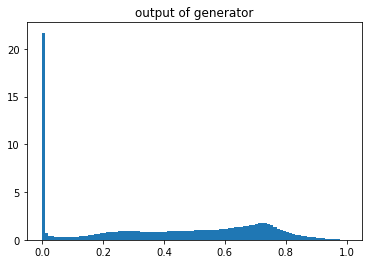

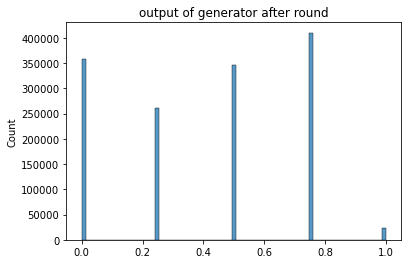

/Users/dengnaicheng/opt/anaconda3/envs/nn/lib/python3.7/site-packages/ipykernel_launcher.py:44: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


n to n distance is 3.5925144397761297
square of n to n distance is 12.90616
# of overlap polymer 0
overlap percentage 0.0%


In [12]:
import models.source.three_layers as model
model_name = 'models/three_layers/three_layers_gan_4000.pth.tar'
check_output_hist(model, model_name, number_bin=100)
directions = round_and_reshape(model, model_name)
coordinates = dc.direction_coordinate_three(directions, 16)
nndistance = nn.n_n_distance(coordinates)
overlap_number = check_overlap(directions, input_directions)
print_result(nndistance, overlap_number)

## check the output for four layers model

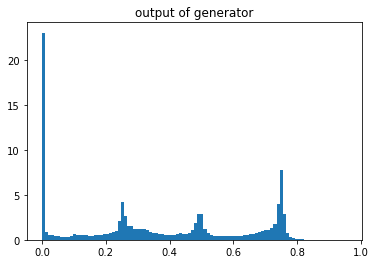

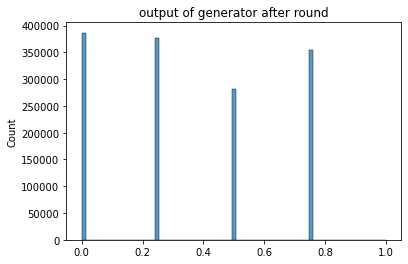

/Users/dengnaicheng/opt/anaconda3/envs/nn/lib/python3.7/site-packages/ipykernel_launcher.py:44: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


n to n distance is 3.5241736620092943
square of n to n distance is 12.419799999999999
# of overlap polymer 0
overlap percentage 0.0%


In [13]:
import models.source.four_layers as model
model_name = 'models/four_layers/four_layers_gan_4000.pth.tar'
check_output_hist(model, model_name, number_bin=100)
directions = round_and_reshape(model, model_name)
coordinates = dc.direction_coordinate_three(directions, 16)
nndistance = nn.n_n_distance(coordinates)
overlap_number = check_overlap(directions, input_directions)
print_result(nndistance, overlap_number)

## five half

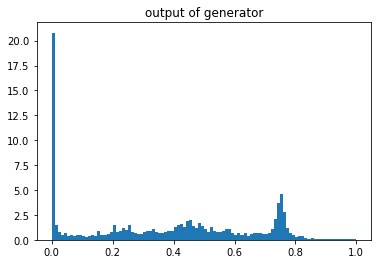

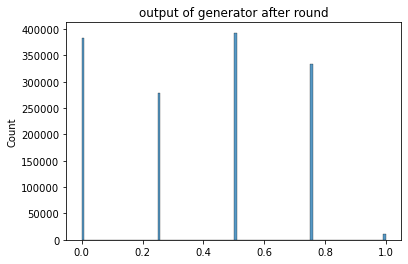

/Users/dengnaicheng/opt/anaconda3/envs/nn/lib/python3.7/site-packages/ipykernel_launcher.py:44: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


n to n distance is 3.765819963832578
square of n to n distance is 14.1814
# of overlap polymer 0
overlap percentage 0.0%


In [14]:
import models.source.five_half as model
model_name = 'models/five_half/five_half_gan_4000.pth.tar'
check_output_hist(model, model_name, number_bin=100)
directions = round_and_reshape(model, model_name)
coordinates = dc.direction_coordinate_three(directions, 16)
nndistance = nn.n_n_distance(coordinates)
overlap_number = check_overlap(directions, input_directions)
print_result(nndistance, overlap_number)

## check the output for five layers model

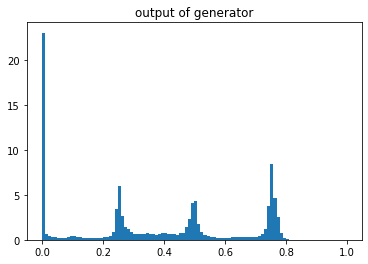

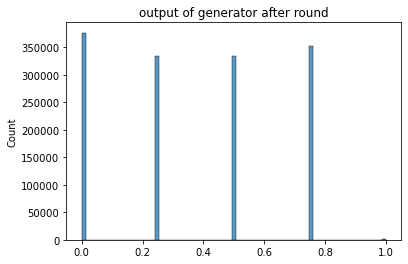

/Users/dengnaicheng/opt/anaconda3/envs/nn/lib/python3.7/site-packages/ipykernel_launcher.py:44: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


n to n distance is 3.741331313850726
square of n to n distance is 13.99756
# of overlap polymer 0
overlap percentage 0.0%


In [15]:
import models.source.five_layers as model
model_name = 'models/five_layers/five_layers_gan_4000.pth.tar'
check_output_hist(model, model_name, number_bin=100)
directions = round_and_reshape(model, model_name)
coordinates = dc.direction_coordinate_three(directions, 16)
nndistance = nn.n_n_distance(coordinates)
overlap_number = check_overlap(directions, input_directions)
print_result(nndistance, overlap_number)

## check the output for five double model

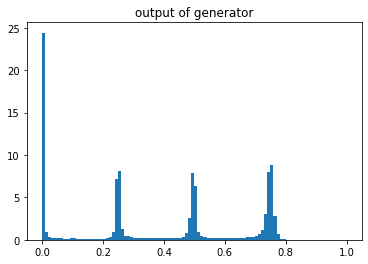

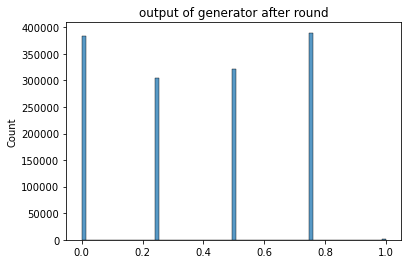

/Users/dengnaicheng/opt/anaconda3/envs/nn/lib/python3.7/site-packages/ipykernel_launcher.py:44: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


n to n distance is 3.681412772292724
square of n to n distance is 13.5528
# of overlap polymer 0
overlap percentage 0.0%


In [16]:
import models.source.five_double as model
model_name = 'models/five_double/five_double_gan_3000.pth.tar'
check_output_hist(model, model_name, number_bin=100)
directions = round_and_reshape(model, model_name)
coordinates = dc.direction_coordinate_three(directions, 16)
nndistance = nn.n_n_distance(coordinates)
overlap_number = check_overlap(directions, input_directions)
print_result(nndistance, overlap_number)

## check the output for six layers model

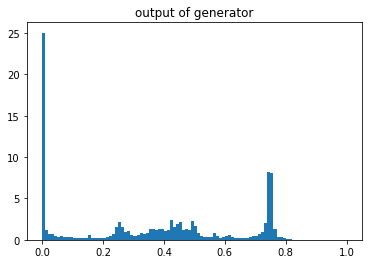

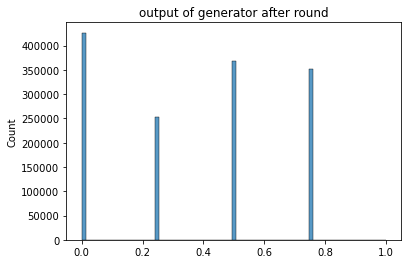

/Users/dengnaicheng/opt/anaconda3/envs/nn/lib/python3.7/site-packages/ipykernel_launcher.py:44: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


n to n distance is 3.745685518032714
square of n to n distance is 14.03016
# of overlap polymer 0
overlap percentage 0.0%


In [17]:
import models.source.six_layers as model
model_name = 'models/six_layers/six_layers_gan_4000.pth.tar'
check_output_hist(model, model_name, number_bin=100)
directions = round_and_reshape(model, model_name)
coordinates = dc.direction_coordinate_three(directions, 16)
nndistance = nn.n_n_distance(coordinates)
overlap_number = check_overlap(directions, input_directions)
print_result(nndistance, overlap_number)

<AxesSubplot:ylabel='Count'>

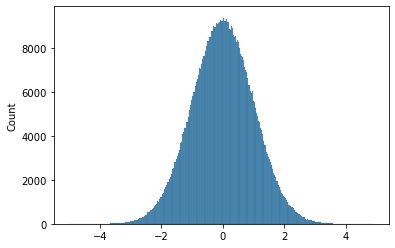

In [2]:
a = func.get_noise(100000, 8)
a = a.reshape(800000)
sns.histplot(a)